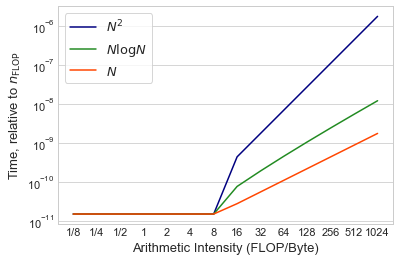

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from math import log, ceil

fig, ax = plt.subplots()
# fig.set_size_inches(4, 3)
AI = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]
s = len(AI)
axes = plt.gca()
# axes.set_ylim([1e-1,1e6])
ax.set_xscale('log')
ax.set_yscale('log')
sns.set_style("whitegrid")

bw=[68, 258];
peak=[588.8,18.8e+03];

Tf = 1. / (peak[0]*1e9);
Tm = 1. / (bw[0]*1e9);
Bt = Tm / Tf;

W = [0] * s
index = 0
for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
    if(np.maximum(1,np.divide(Bt,AI[index])) > 1):
        W[index] = i
    else:
        W[index] = i**2
    index = index + 1
W_Tf = np.multiply(Tf, W);
T = W_Tf * np.maximum(1,np.divide(Bt,AI));
line1, = ax.plot(AI, T,label='$N^2$',color='navy')

W = [0] * s
index = 0
for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
    if(np.maximum(1,np.divide(Bt,AI[index])) > 1):
        W[index] = i
    else:
        W[index] = i * np.log(i)
    index = index + 1
W_Tf = np.multiply(Tf, W);
T = W_Tf * np.maximum(1,np.divide(Bt,AI));
line1, = ax.plot(AI, T,label='$N \log N$',color='forestgreen')

W = [0] * s
index = 0
for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
    W[index] = i
    index = index + 1
W_Tf = np.multiply(Tf, W);
T = W_Tf * np.maximum(1,np.divide(Bt,AI));
line1, = ax.plot(AI, T,label='$N$',color='orangered')

# W = [0] * s
# index = 0
# for i in [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]:
#     if(np.maximum(1,np.divide(Bt,AI[index])) > 1):
#         W[index] = i
#     else:
#         W[index] = i**2
#     index = index + 1
# W_Tf = np.multiply(Tf, W);
# T = W_Tf * np.maximum(1,np.divide(Bt,AI));
# line1, = ax.plot(AI, T * 1e9,color='navy')

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

sns.set_context(rc={"font.size":11})   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
ax.set_xticklabels(['1/8','1/4','1/2','1','2','4','8','16','32','64','128','256','512','1024'],rotation=0)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticks(AI)                                                       
ax.set_ylabel('Time, relative to $n_{\mathrm{FLOP}}$',size=13)
ax.set_xlabel('Arithmetic Intensity (FLOP/Byte)',size=13)

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.show()
fig = ax.get_figure()
fig.savefig('efficiencyT.pdf',bbox_inches='tight')

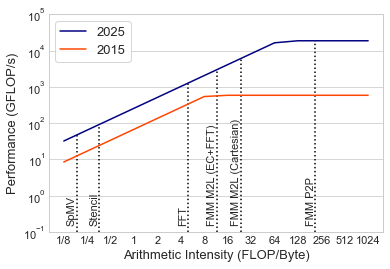

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from math import log, ceil

fig, ax = plt.subplots()
# fig.set_size_inches(4, 3)
AI = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]
axes = plt.gca()
axes.set_ylim([1e-1,1e5])
ax.set_xscale('log')
ax.set_yscale('log')
sns.set_style("whitegrid")

# bw=[68, 517];
# peak=[588.8,1.1188e+05];

bw=[68, 258];
peak=[588.8,18.8e+03];


AI_BW = np.multiply(bw[1],AI)
perf = np.minimum(AI_BW,peak[1])
ax.plot(AI, perf,label='2025',color='navy') 

AI_BW = np.multiply(bw[0],AI)
perf = np.minimum(AI_BW,peak[0])
line1, = ax.plot(AI, perf,label='2015',color='orangered')

AI_BW = np.multiply(bw[1],AI)
perf = np.minimum(AI_BW,peak[1])
vline_min=0.1;
y_min=0.15;
x_value=4.8773;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-1.2,y_min,'FFT',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=211.3476;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-50,y_min,'FMM P2P',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=23.5898;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-6,y_min,'FMM M2L (Cartesian)',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=11.8024;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-3,y_min,'FMM M2L (EC+FFT)',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=0.1849;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-0.05,y_min,'SpMV',rotation=90, fontsize=11,verticalalignment='bottom')

x_value=0.3549;
y_value = np.interp(x_value, AI, perf);
plt.vlines(x=x_value, ymin=vline_min, ymax=y_value, color='black', zorder=2, linestyle=':')
plt.text(x_value-0.09,y_min,'Stencil',rotation=90, fontsize=11,verticalalignment='bottom')

sns.set_context(rc={"font.size":11})   
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
ax.set_xticklabels(['1/8','1/4','1/2','1','2','4','8','16','32','64','128','256','512','1024'],rotation=0)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticks(AI)                                                       
ax.set_ylabel('Performance (GFLOP/s)',size=13)
ax.set_xlabel('Arithmetic Intensity (FLOP/Byte)',size=13)

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.show()
fig = ax.get_figure()
fig.savefig('roofline.pdf',bbox_inches='tight')

In [69]:
1160*190.8




221328.0

In [70]:
18*4

72

In [71]:
512+128


640

In [72]:
1536./1000

1.536

In [73]:
2.91/2

1.455

In [74]:
2.3 * 4 * 2 * 2 * 16

588.8

In [75]:
8192*2

16384

In [60]:
1e6

1000000.0

In [54]:
32**4

1048576